In [1]:
import os
os.environ['KAGGLE_USERNAME']="mqasimali"
os.environ['KAGGLE_KEY']="03318089e106031ba1a9847ff6f1fd25"
!kaggle datasets download iarunava/cell-images-for-detecting-malaria

Dataset URL: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria
License(s): unknown
100% 673M/675M [00:30<00:00, 24.3MB/s]
100% 675M/675M [00:31<00:00, 22.8MB/s]


In [2]:
!unzip cell-images-for-detecting-malaria

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_87.png  
  inflating: cell_im

In [3]:

import numpy as np
import os
import cv2
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization

np.random.seed(1000)
image_directory = 'cell_images/'
SIZE = 64
images = []
label = []  # 0 to parasitized  and 1 to uninfected.

parasitized_images = os.listdir(image_directory + 'Parasitized/')
for i, image_name in enumerate(parasitized_images):

    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'Parasitized/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        images.append(np.array(image))
        label.append(0)


uninfected_images = os.listdir(image_directory + 'Uninfected/')
for i, image_name in enumerate(uninfected_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'Uninfected/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        images.append(np.array(image))
        label.append(1)

print(len(images))
print(len(label))

27558
27558


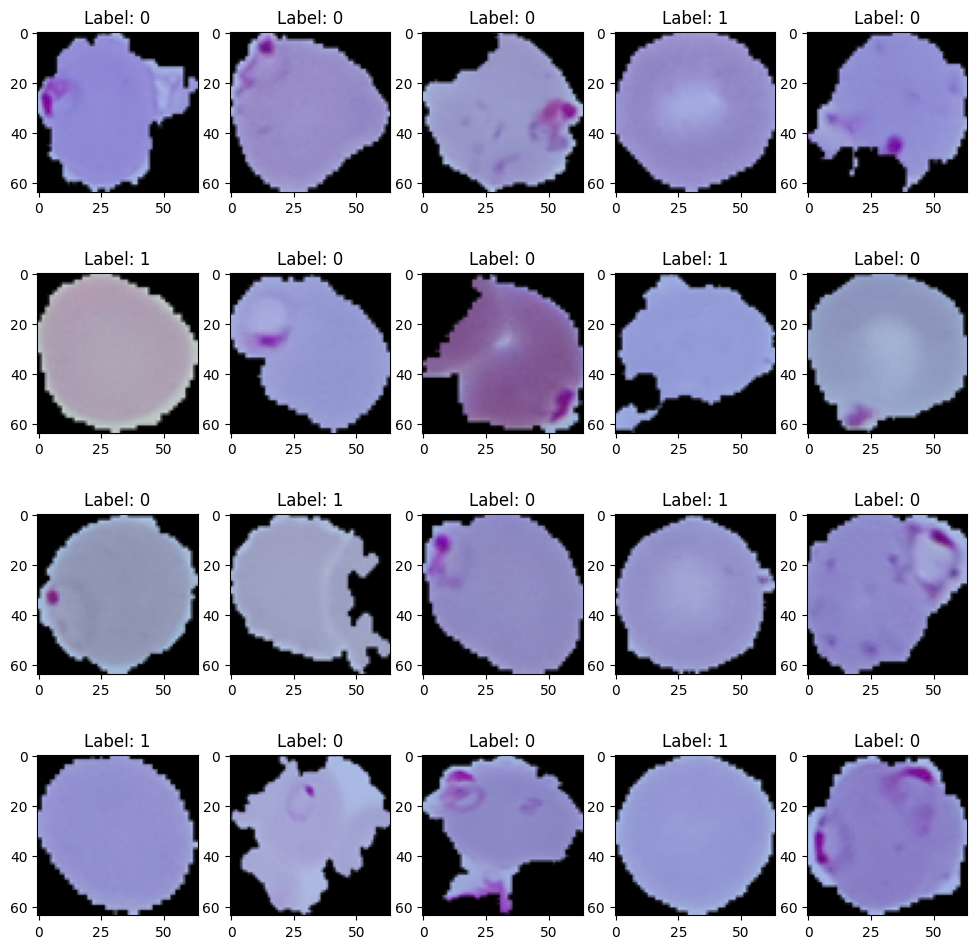

In [4]:
import matplotlib.pyplot as plt
import random

data = list(zip(images, label))

random.shuffle(data)

num_images_to_visualize = 20
num_images_per_row = 5
num_rows = num_images_to_visualize // num_images_per_row

fig, axes = plt.subplots(num_rows, num_images_per_row, figsize=(12, 12))

for i in range(num_images_to_visualize):
    ax = axes[i // num_images_per_row, i % num_images_per_row]
    ax.imshow(data[i][0])
    ax.set_title('Label: {}'.format(data[i][1]))
    ax.axis('on')

plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(images, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)


In [6]:
# CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3), padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print ("CNN Training")
# model.summary()
history = model.fit(np.array(X_train), y_train,batch_size = 64,epochs = 30,validation_split = 0.2 )

CNN Training
Epoch 1/30
276/276 [==============================] - 26s 46ms/step - loss: 0.3129 - accuracy: 0.8864 - val_loss: 0.4281 - val_accuracy: 0.8959
Epoch 2/30
276/276 [==============================] - 11s 39ms/step - loss: 0.1535 - accuracy: 0.9505 - val_loss: 0.2419 - val_accuracy: 0.9404
Epoch 3/30
276/276 [==============================] - 11s 39ms/step - loss: 0.1350 - accuracy: 0.9522 - val_loss: 0.2675 - val_accuracy: 0.9488
Epoch 4/30
276/276 [==============================] - 11s 39ms/step - loss: 0.1280 - accuracy: 0.9568 - val_loss: 0.1162 - val_accuracy: 0.9610
Epoch 5/30
276/276 [==============================] - 11s 40ms/step - loss: 0.1196 - accuracy: 0.9579 - val_loss: 0.1105 - val_accuracy: 0.9637
Epoch 6/30
276/276 [==============================] - 11s 40ms/step - loss: 0.1182 - accuracy: 0.9572 - val_loss: 0.1471 - val_accuracy: 0.9488
Epoch 7/30
276/276 [==============================] - 11s 41ms/step - loss: 0.1126 - accuracy: 0.9605 - val_loss: 0.1092 - 

In [8]:
# print ("Resnet Training")
# history = model.fit(np.array(X_train), y_train,batch_size = 64,epochs = 30,validation_split = 0.2 )
# print ("VGG Training")
# history1= model1.fit(np.array(X_train), y_train,batch_size = 64,epochs = 30,validation_split = 0.2 )
# print ("Densenet Training")
# history2= model2.fit(np.array(X_train), y_train,batch_size = 64,epochs = 30,validation_split = 0.2 )

173/173 [==============================] - 1s 5ms/step


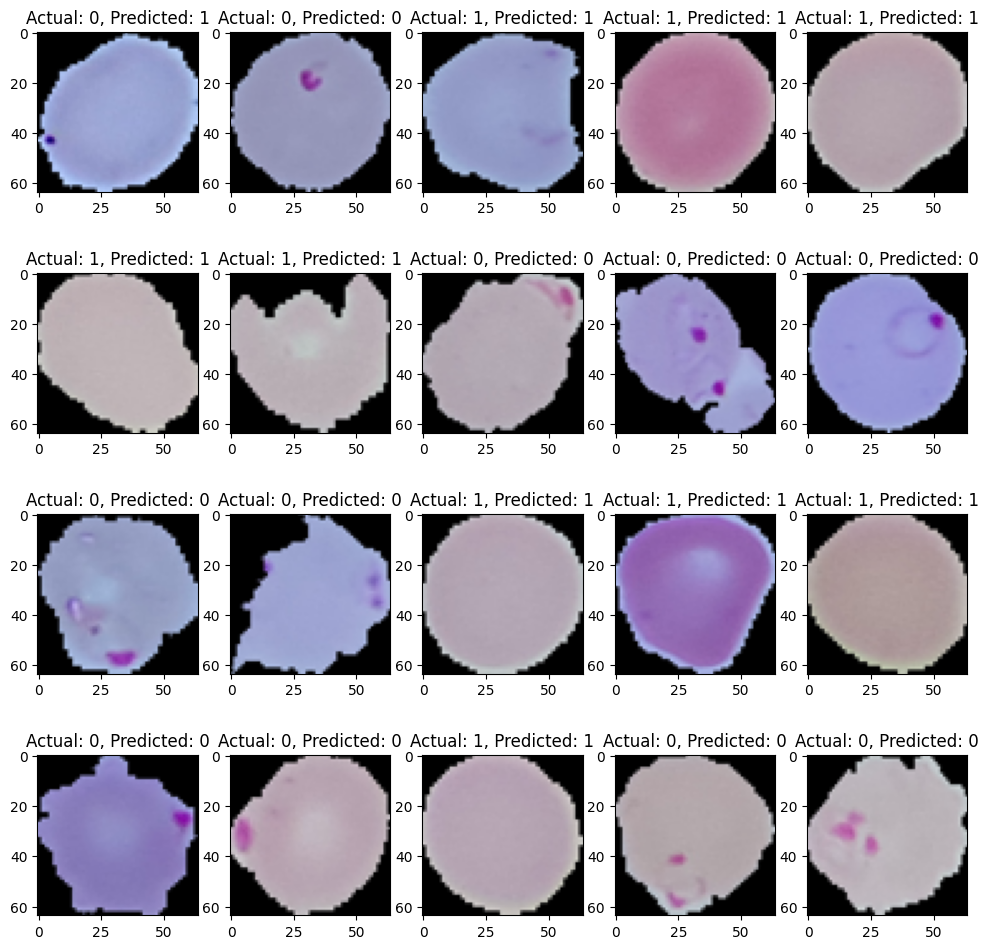

In [9]:
predictions = model.predict(np.array(X_test))
#print (predictions)

# Convert predictions to binary values (0 or 1)
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(y_test, axis=1)

# Visualize actual vs. predicted labels
num_test_images = len(X_test)
num_images_to_visualize = min(20, num_test_images)

fig, axes = plt.subplots(4, 5, figsize=(12, 12))

for i in range(num_images_to_visualize):
    ax = axes[i // 5, i % 5]
    ax.imshow(X_test[i])
    ax.set_title(f'Actual: {actual_labels[i]}, Predicted: {predicted_labels[i]}')
    ax.axis('on')

plt.show()

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(actual_labels, predicted_labels)
recall = recall_score(actual_labels, predicted_labels)
f1 = f1_score(actual_labels, predicted_labels)
accuracy = accuracy_score(actual_labels, predicted_labels)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

model.save('malaria_cell.h5')


Precision: 0.8641
Recall: 0.9847
F1 Score: 0.9205


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


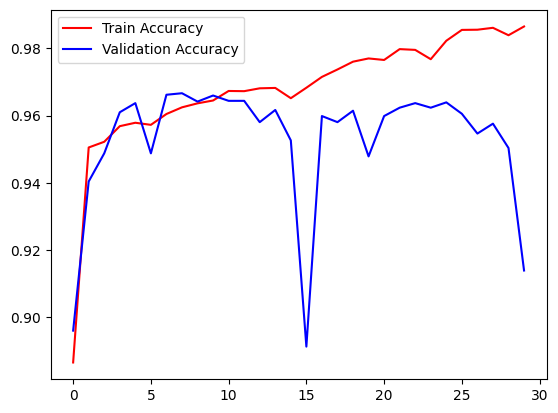

In [11]:

plt.plot(history.history['accuracy'], label='Train Accuracy', color='r')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='b')

plt.legend()
plt.show()


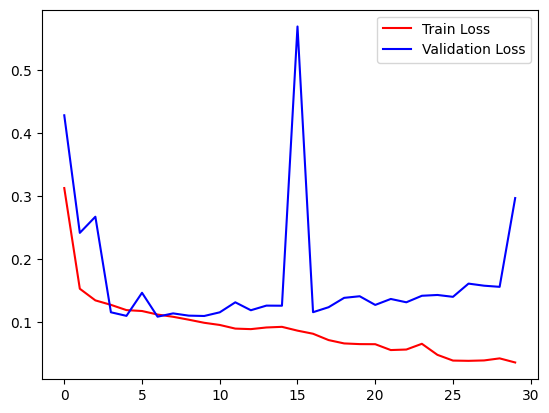

In [12]:

plt.plot(history.history['loss'], label='Train Loss', color='r')
plt.plot(history.history['val_loss'], label='Validation Loss', color='b')
plt.legend()
plt.show()

In [13]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model = load_model('malaria_cell.h5')  # Replace with the actual path to your saved model

# Prompt the user for the file path of the image
image_path = input("Enter the file path of the image: ")

# Preprocess the user-input image
img = image.load_img(image_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Make predictions
predictions = model.predict(img_array)

# Process predictions as needed
predicted_class = np.argmax(predictions)
print(f'Predicted Class: {predicted_class}')

Enter the file path of the image: /content/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png
1/1 [==============================] - 1s 522ms/step
Predicted Class: 1
